## Simple example GluonTS

In [1]:
def convert_gluonts_result_to_multiindex(gluonts_result):
    """
    Convert the output of Gluonts's prediction to a multiindex dataframe 
    compatible with sktime

    Parameters
    ----------
    gluonts_result: The first element of the tuple resulting 
    from running `make_evaluation_predictions`.
        For example in Eg: 
        forecast_it, ts_it = make_evaluation_predictions()
        gluonts_result = forecast_it
    
    Returns
    -------
    A MultiIndex DF mtype type compatible with sktime

    """
    
    import pandas as pd 
    from sktime.datatypes import convert_to


    instance_no = len(gluonts_result)
    global_ls = []
    per_instance_ls = []
    columns = []
    validation_no = gluonts_result[0].samples.shape[0]
    
    for i in range(instance_no):
        
        period = gluonts_result[i].samples.shape[1]
        start_date = gluonts_result[i].start_date.to_timestamp()
        freq = gluonts_result[i].freq
        ts_index = pd.date_range(start = start_date, periods = period, freq = freq)
        per_instance_ls = [pd.Series(data=gluonts_result[i].samples[j], index = ts_index) for j in range(validation_no)]
        global_ls.append(per_instance_ls)

    for k in range(validation_no):
        columns.append("result_" + str(k))
    
    nested_univ = pd.DataFrame(global_ls, columns=columns)
    
    return nested_univ

/mnt/01D7B0AB8D0B4060/gluon-ts/src/gluonts/mx/trainer/learning_rate_scheduler.py:68: RuntimeWarning: fields may not start with an underscore, ignoring "_current_patience"
  class Patience:
[09:50:23] ../src/base.cc:79: cuDNN lib mismatch: linked-against version 8201 != compiled-against version 8101.  Set MXNET_CUDNN_LIB_CHECKING=0 to quiet this warning.
100%|██████████| 50/50 [00:00<00:00, 205.57it/s, epoch=5/5, avg_epoch_loss=4.15]


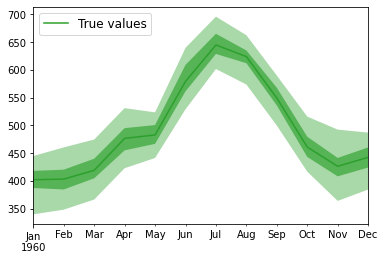

In [2]:
from gluonts.dataset.util import to_pandas
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.repository.datasets import get_dataset
from gluonts.mx.model.simple_feedforward import SimpleFeedForwardEstimator
from gluonts.mx import Trainer
import matplotlib.pyplot as plt
from sktime.datatypes import convert_to

dataset = get_dataset("airpassengers")
deepar = SimpleFeedForwardEstimator(prediction_length=12, trainer=Trainer(epochs=5))
model = deepar.train(dataset.train)

# Make predictions
true_values = to_pandas(list(dataset.test)[0])
prediction_input = PandasDataset(true_values[:-12])
predictions = model.predict(prediction_input)

for color, prediction in zip(["green"], predictions):
    prediction.plot(color=f"tab:{color}")

plt.legend(["True values"], loc="upper left", fontsize="large")

In [3]:
dataset = get_dataset("airpassengers")
deepar = SimpleFeedForwardEstimator(prediction_length=12, trainer=Trainer(epochs=5))
model = deepar.train(dataset.train)

# Make predictions
true_values = to_pandas(list(dataset.test)[0])
prediction_input = PandasDataset(true_values[:-12])
predictions = model.predict(prediction_input)

#for color, prediction in zip(["green"], predictions):
#    prediction.plot(color=f"tab:{color}")

#plt.legend(["True values"], loc="upper left", fontsize="large")

100%|██████████| 50/50 [00:00<00:00, 214.50it/s, epoch=5/5, avg_epoch_loss=4.06]


In [4]:
result_ls = list(predictions)

In [5]:
result_ls

[gluonts.model.forecast.SampleForecast(info=None, item_id=None, samples=numpy.array([[387.0394592285156, 464.7552795410156, 453.0965576171875, 460.5640563964844, 489.3630065917969, 549.8546142578125, 617.0894775390625, 633.0555419921875, 662.0039672851562, 423.567626953125, 458.34161376953125, 442.05120849609375], [426.1087646484375, 436.4686279296875, 477.0074768066406, 465.07098388671875, 479.7242126464844, 550.7178955078125, 603.2525024414062, 620.9295043945312, 568.0158081054688, 480.14215087890625, 451.97979736328125, 432.3995056152344], [405.9692687988281, 450.58978271484375, 467.64599609375, 487.92608642578125, 489.6726379394531, 568.7158203125, 612.5421142578125, 600.25634765625, 537.7533569335938, 434.0978698730469, 422.0760803222656, 452.182861328125], [442.9012451171875, 458.5015869140625, 467.181396484375, 484.0005798339844, 468.84478759765625, 566.5750732421875, 544.9984130859375, 621.9002685546875, 568.9863891601562, 476.3122253417969, 423.8991394042969, 459.5421752929687

In [6]:
convert_gluonts_result_to_multiindex(result_ls)

,result_0,result_1,result_2,result_3,result_4,result_5,result_6,result_7,result_8,result_9,...,result_90,result_91,result_92,result_93,result_94,result_95,result_96,result_97,result_98,result_99
0,1960-01-31 387.039459 1960-02-29 464.755...,1960-01-31 426.108765 1960-02-29 436.468...,1960-01-31 405.969269 1960-02-29 450.589...,1960-01-31 442.901245 1960-02-29 458.501...,1960-01-31 446.614227 1960-02-29 447.010...,1960-01-31 400.883881 1960-02-29 459.154...,1960-01-31 411.257385 1960-02-29 445.958...,1960-01-31 436.949341 1960-02-29 437.552...,1960-01-31 428.909882 1960-02-29 426.746...,1960-01-31 394.106140 1960-02-29 407.999...,...,1960-01-31 424.818939 1960-02-29 443.379...,1960-01-31 507.631805 1960-02-29 438.468...,1960-01-31 484.845642 1960-02-29 478.720...,1960-01-31 428.580902 1960-02-29 486.647...,1960-01-31 438.583801 1960-02-29 454.477...,1960-01-31 383.332397 1960-02-29 439.801...,1960-01-31 449.583893 1960-02-29 447.083...,1960-01-31 404.058655 1960-02-29 441.026...,1960-01-31 412.650085 1960-02-29 474.616...,1960-01-31 388.315796 1960-02-29 454.554...


In [7]:
control_result = convert_to(convert_gluonts_result_to_multiindex(result_ls), to_type="pd-multiindex")

In [8]:
control_result

result_0    result_1    result_2    result_3  \
instances timepoints                                                   
0         1960-01-31  387.039459  426.108765  405.969269  442.901245   
          1960-02-29  464.755280  436.468628  450.589783  458.501587   
          1960-03-31  453.096558  477.007477  467.645996  467.181396   
          1960-04-30  460.564056  465.070984  487.926086  484.000580   
          1960-05-31  489.363007  479.724213  489.672638  468.844788   
          1960-06-30  549.854614  550.717896  568.715820  566.575073   
          1960-07-31  617.089478  603.252502  612.542114  544.998413   
          1960-08-31  633.055542  620.929504  600.256348  621.900269   
          1960-09-30  662.003967  568.015808  537.753357  568.986389   
          1960-10-31  423.567627  480.142151  434.097870  476.312225   
          1960-11-30  458.341614  451.979797  422.076080  423.899139   
          1960-12-31  442.051208  432.399506  452.182861  459.542175   

                        result_4    result_5    result_6    result_7  \
instances timepoints                                                   
0         1960-01-31  446.614227  400.883881  411.257385  436.949341   
          1960-02-29  447.010651  459.154114  445.958038  437.552765   
          1960-03-31  453.378357  464.713928  434.270538  447.498901   
          1960-04-30  510.717560  500.336090  451.579376  513.272400   
          1960-05-31  470.542938  458.770844  454.501862  523.673096   
          1960-06-30  525.991943  595.250610  523.960144  601.212158   
          1960-07-31  591.481873  593.686462  643.070923  553.786621   
          1960-08-31  608.173645  503.871979  625.854919  638.369446   
          1960-09-30  578.583252  555.414307  576.940918  575.302551   
          1960-10-31  510.726654  467.284149  462.187653  418.708221   
          1960-11-30  437.819519  434.938019  414.341309  384.579559   
          1960-12-31  538.667175  425.369568  488.423615  431.150818   

                        result_8    result_9  ...   result_90   result_91  \
instances timepoints                          ...                           
0         1960-01-31  428.909882  394.106140  ...  424.818939  507.631805   
          1960-02-29  426.746033  407.999512  ...  443.379486  438.468567   
          1960-03-31  456.882019  443.525879  ...  494.304504  449.978333   
          1960-04-30  494.289612  479.550446  ...  478.981659  470.785858   
          1960-05-31  479.853790  458.550354  ...  452.389557  490.310944   
          1960-06-30  537.210083  572.543884  ...  565.043823  545.886108   
          1960-07-31  603.107788  609.578308  ...  618.089355  623.816772   
          1960-08-31  602.714600  631.193115  ...  639.661499  651.265808   
          1960-09-30  571.709595  548.345154  ...  588.623718  588.973877   
          1960-10-31  482.337006  488.201721  ...  453.044861  459.932129   
          1960-11-30  411.760742  384.561432  ...  427.701843  426.562897   
          1960-12-31  456.175140  440.428436  ...  393.984344  462.146759   

                       result_92   result_93   result_94   result_95  \
instances timepoints                                                   
0         1960-01-31  484.845642  428.580902  438.583801  383.332397   
          1960-02-29  478.720093  486.647675  454.477081  439.801880   
          1960-03-31  483.135315  437.487518  486.702209  462.358002   
          1960-04-30  505.066803  483.417480  578.473694  413.516937   
          1960-05-31  446.855927  501.972351  503.443359  523.665955   
          1960-06-30  533.947083  543.484558  537.081177  638.287720   
          1960-07-31  579.124878  692.770813  624.177856  643.565002   
          1960-08-31  565.501526  618.188171  631.601440  636.539795   
          1960-09-30  595.200989  556.564575  620.319824  590.791809   
          1960-10-31  473.961060  438.558319  420.993713  444.557220   
          1960-11-30  462.247650  431.430969  435.773682  349.9

## Begin pytest

In [9]:
import numpy as np
import pandas as pd
import pytest

#from sktime.datatypes._adapter import convert_gluonts_result_to_multiindex

N_TIMEPOINTS = [3, 5]

n_timepoints = 3
#def test_from_gluonts_to_multiindex(n_timepoints):
import numpy as np
import pandas as pd

from sktime.datatypes import convert_to
from gluonts.dataset.util import to_pandas
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.repository.datasets import get_dataset
from gluonts.mx.model.simple_feedforward import SimpleFeedForwardEstimator
from gluonts.mx import Trainer

def get_sample_gluon_result(horizon):
    dataset = get_dataset("airpassengers")
    simple_model = SimpleFeedForwardEstimator(
        prediction_length=horizon, 
        trainer=Trainer(epochs=5))
    model = simple_model.train(dataset.train)

    # Make predictions
    true_values = to_pandas(list(dataset.test)[0])
    true_values.to_timestamp()
    prediction_input = PandasDataset(true_values[:-horizon])
    predictions = model.predict(prediction_input)
    return list(predictions)
gluonts_result = get_sample_gluon_result(horizon = n_timepoints)
# Result from the converter
converter_result = convert_gluonts_result_to_multiindex(gluonts_result)
dimension_name = converter_result.columns
converter_result = convert_to(converter_result, to_type="nested_univ")
# Result from manual conversion
instance_no = len(gluonts_result)
global_ls = []
per_instance_ls = []
columns = []
validation_no = gluonts_result[0].samples.shape[0]
for i in range(instance_no):
    period = gluonts_result[i].samples.shape[1]
    start_date = gluonts_result[i].start_date.to_timestamp()
    freq = gluonts_result[i].freq
    ts_index = pd.date_range(start = start_date, periods = period, freq = freq)
    per_instance_ls = [pd.Series(data=gluonts_result[i].samples[j], index = ts_index) for j in range(validation_no)]
    global_ls.append(per_instance_ls)
for k in range(validation_no):
    columns.append("result_" + str(k))
manual_result = pd.DataFrame(global_ls, columns=columns)
    




100%|██████████| 50/50 [00:00<00:00, 209.50it/s, epoch=5/5, avg_epoch_loss=4.88]


In [10]:
converter_result

,result_0,result_1,result_2,result_3,result_4,result_5,result_6,result_7,result_8,result_9,...,result_90,result_91,result_92,result_93,result_94,result_95,result_96,result_97,result_98,result_99
0,1960-10-31 465.203796 1960-11-30 491.843...,1960-10-31 506.742065 1960-11-30 683.964...,1960-10-31 557.367615 1960-11-30 465.756...,1960-10-31 514.969116 1960-11-30 445.318...,1960-10-31 450.374908 1960-11-30 636.605...,1960-10-31 575.310425 1960-11-30 515.973...,1960-10-31 619.258667 1960-11-30 521.875...,1960-10-31 468.953430 1960-11-30 596.611...,1960-10-31 665.057129 1960-11-30 487.176...,1960-10-31 519.498962 1960-11-30 625.534...,...,1960-10-31 567.022461 1960-11-30 824.226...,1960-10-31 458.448761 1960-11-30 452.531...,1960-10-31 433.581390 1960-11-30 496.124...,1960-10-31 556.255249 1960-11-30 549.109...,1960-10-31 529.370605 1960-11-30 665.135...,1960-10-31 515.264526 1960-11-30 520.192...,1960-10-31 482.084473 1960-11-30 525.592...,1960-10-31 559.880737 1960-11-30 564.375...,1960-10-31 513.957275 1960-11-30 533.633...,1960-10-31 488.752411 1960-11-30 566.707...


In [11]:
manual_result

,result_0,result_1,result_2,result_3,result_4,result_5,result_6,result_7,result_8,result_9,...,result_90,result_91,result_92,result_93,result_94,result_95,result_96,result_97,result_98,result_99
0,1960-10-31 465.203796 1960-11-30 491.843...,1960-10-31 506.742065 1960-11-30 683.964...,1960-10-31 557.367615 1960-11-30 465.756...,1960-10-31 514.969116 1960-11-30 445.318...,1960-10-31 450.374908 1960-11-30 636.605...,1960-10-31 575.310425 1960-11-30 515.973...,1960-10-31 619.258667 1960-11-30 521.875...,1960-10-31 468.953430 1960-11-30 596.611...,1960-10-31 665.057129 1960-11-30 487.176...,1960-10-31 519.498962 1960-11-30 625.534...,...,1960-10-31 567.022461 1960-11-30 824.226...,1960-10-31 458.448761 1960-11-30 452.531...,1960-10-31 433.581390 1960-11-30 496.124...,1960-10-31 556.255249 1960-11-30 549.109...,1960-10-31 529.370605 1960-11-30 665.135...,1960-10-31 515.264526 1960-11-30 520.192...,1960-10-31 482.084473 1960-11-30 525.592...,1960-10-31 559.880737 1960-11-30 564.375...,1960-10-31 513.957275 1960-11-30 533.633...,1960-10-31 488.752411 1960-11-30 566.707...


In [12]:
manual_result.loc[0, "result_1"].to_numpy()

array([506.74207, 683.9647 , 611.0193 ], dtype=float32)

In [13]:
import numpy as np
import pandas as pd
import pytest

#from sktime.datatypes._adapter import convert_gluonts_result_to_multiindex

N_TIMEPOINTS = [3, 5]

n_timepoints = 3
#def test_from_gluonts_to_multiindex(n_timepoints):
import numpy as np
import pandas as pd

from sktime.datatypes import convert_to
from gluonts.dataset.util import to_pandas
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.repository.datasets import get_dataset
from gluonts.mx.model.simple_feedforward import SimpleFeedForwardEstimator
from gluonts.mx import Trainer

def get_sample_gluon_result(horizon):
    dataset = get_dataset("airpassengers")
    simple_model = SimpleFeedForwardEstimator(
        prediction_length=horizon, 
        trainer=Trainer(epochs=5))
    model = simple_model.train(dataset.train)

    # Make predictions
    true_values = to_pandas(list(dataset.test)[0])
    true_values.to_timestamp()
    prediction_input = PandasDataset(true_values[:-horizon])
    predictions = model.predict(prediction_input)
    return list(predictions)
gluonts_result = get_sample_gluon_result(horizon = n_timepoints)
# Result from the converter
converter_result = convert_gluonts_result_to_multiindex(gluonts_result)
dimension_name = converter_result.columns
converter_result = convert_to(converter_result, to_type="nested_univ")
# Result from manual conversion
instance_no = len(gluonts_result)
global_ls = []
per_instance_ls = []
columns = []
validation_no = gluonts_result[0].samples.shape[0]
for i in range(instance_no):
    period = gluonts_result[i].samples.shape[1]
    start_date = gluonts_result[i].start_date.to_timestamp()
    freq = gluonts_result[i].freq
    ts_index = pd.date_range(start = start_date, periods = period, freq = freq)
    per_instance_ls = [pd.Series(data=gluonts_result[i].samples[j], index = ts_index) for j in range(validation_no)]
    global_ls.append(per_instance_ls)
for k in range(validation_no):
    columns.append("result_" + str(k))
manual_result = pd.DataFrame(global_ls, columns=columns)
    




100%|██████████| 50/50 [00:00<00:00, 217.05it/s, epoch=5/5, avg_epoch_loss=4.86]


In [14]:
    # Perform the test
    for instance, _dim_name in manual_result.iterrows():
        for dim_no, dim in enumerate(dimension_name):
            np.testing.assert_array_equal(
                manual_result.loc[instance, dim].to_numpy(),
                converter_result.loc[instance, dim].to_numpy(),
            ) 